<a href="https://colab.research.google.com/github/Rathna-2003/datascience/blob/main/GRIP_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
#to display all the graph in the workbook
%matplotlib inline
sbn.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
df.shape

(150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
#dataset duplicate value count
len(df[df.duplicated()])

1

***`VISUALIZING THE DATASET `***

<Axes: ylabel='Count'>

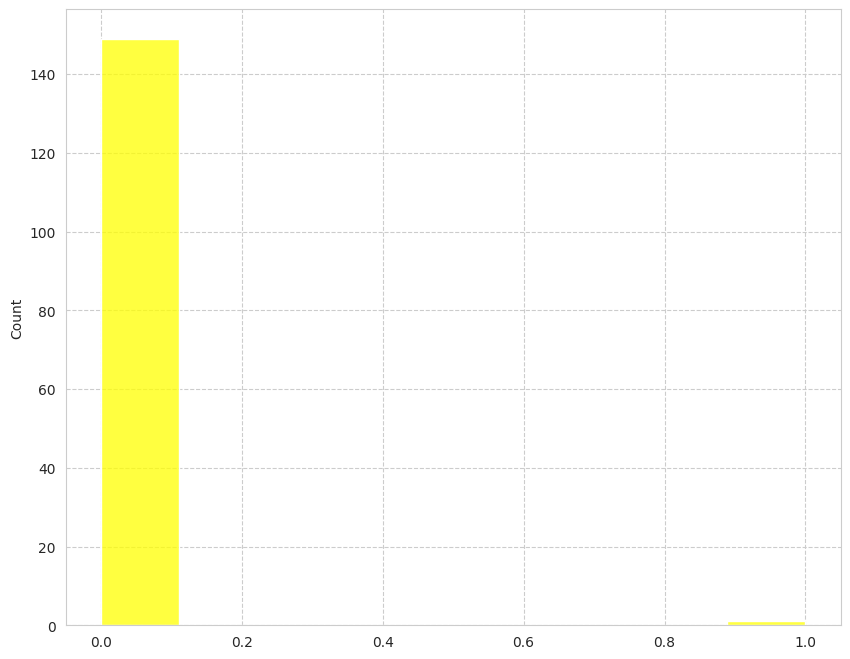

In [18]:
#visualizing
plt.figure(figsize=(10,8))
sbn.histplot(x=df.duplicated(),color='yellow',)

In [ ]:
#missing values/null values count
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

***`SCATTER PLOT VISUALIZING :-`***

<Axes: >

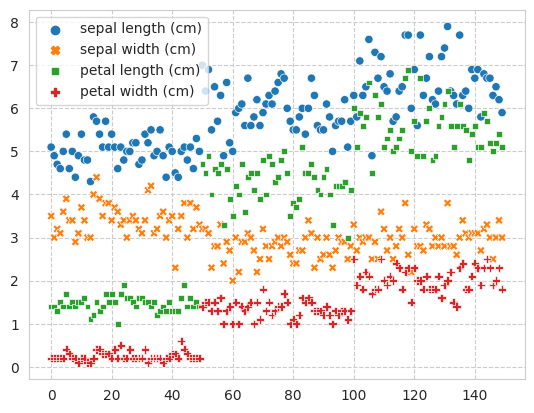

In [ ]:
#visualizing the dataset
sbn.scatterplot(df)

***`BAR PLOT VISUALIZING :-`***

<Axes: >

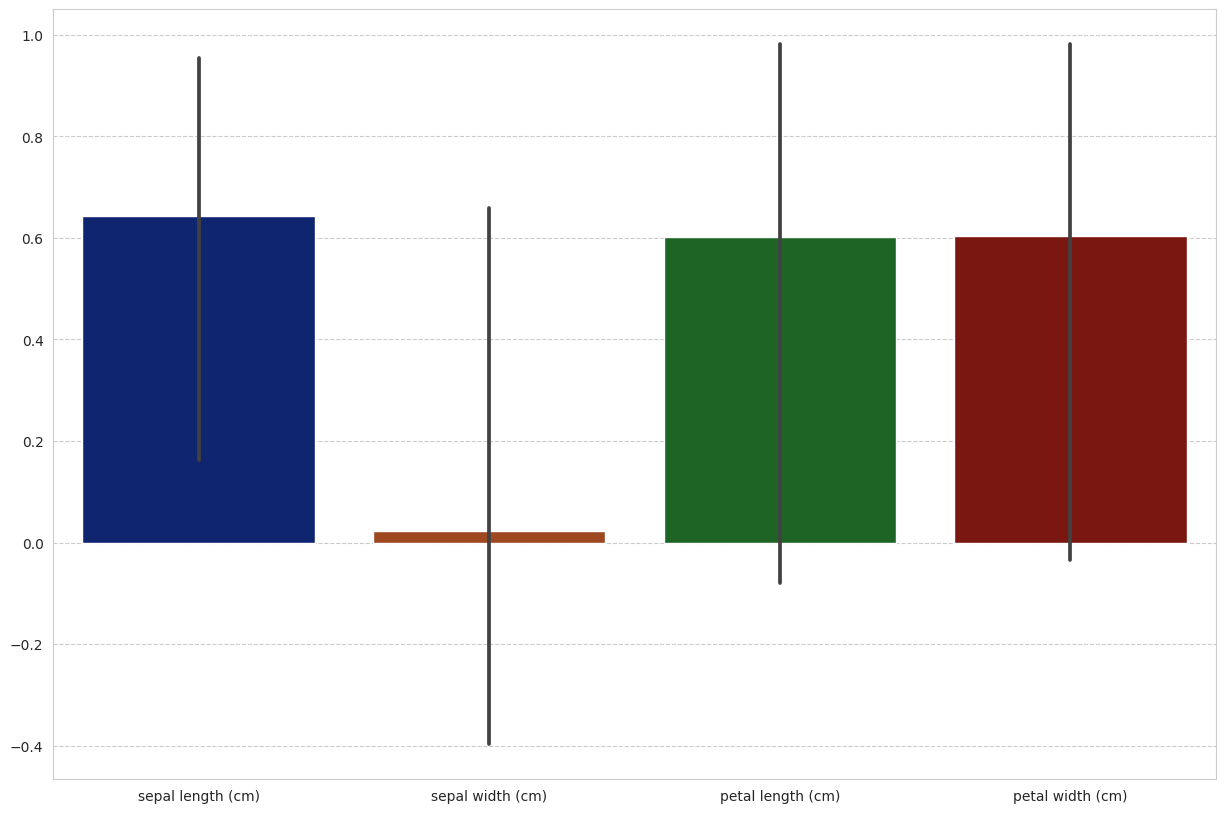

In [ ]:
#visualizing the barplot dataset
plt.figure(figsize=(15,10))
sbn.barplot(df.corr(),palette='dark')


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(df)


In [ ]:
from sklearn.cluster import KMeans

***`TO FIND THE OPTIMUM NUMBER OF CLUSTER USING UNSUEPERVISED ML`***

In [ ]:
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(data)
    wcss.append(km.inertia_)

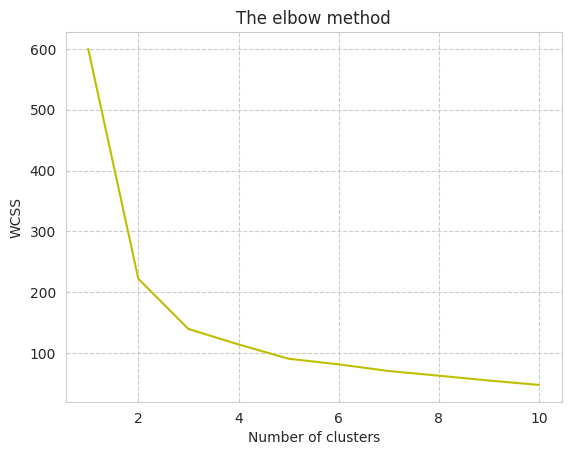

In [ ]:
plt.plot(range(1, 11), wcss,color='y')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

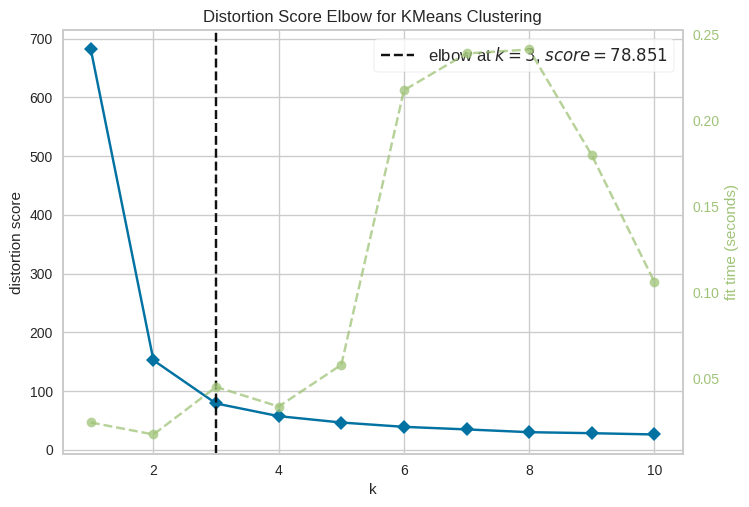

In [ ]:
from yellowbrick.cluster import KElbowVisualizer as ev
elbow=ev(km,k=range(1,11))
elbow.fit(df)
elbow.poof()
plt.show()

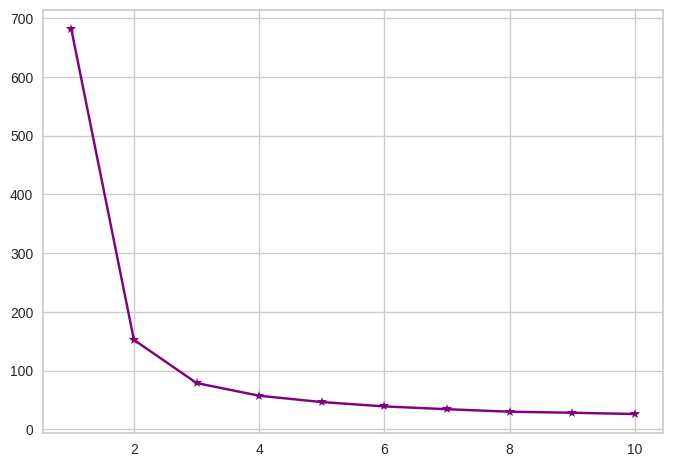

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    km = KMeans(n_clusters = i , random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)
plt.plot(range(1,11), sse, color = 'purple' , marker = '*')
plt.title("value of K")
plt.xlabel("k")
plt.ylabel("sum of square error")
plt.show()

In [ ]:
model = KMeans(n_clusters = 3 , random_state = 0)
y_means = model.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Text(0, 0.5, 'petal width (cm)')

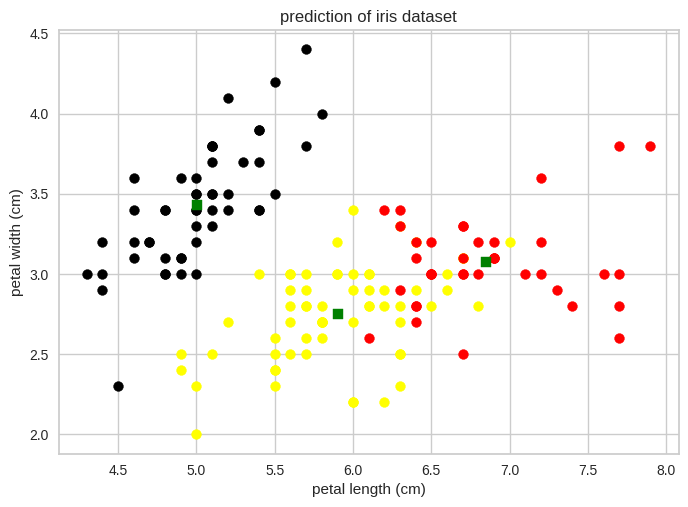

In [ ]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],c = 'yellow', s= 50 , label = 'Iris-setosa')
plt.scatter(x[y_means == 1,0], x[y_means == 1 , 1] , c = 'black' ,s=50, label = 'Iris-versicolour')
plt.scatter(x[y_means == 2,0] , x[y_means == 2,1] , c = 'red', s = 50 , label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],marker = 's' , c = 'green' , label = 'Centriods')
plt.title("prediction of iris dataset")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')



***HENCE IT IS K MEANS CLUSTERING***